# Get started with Qiskit

This page is for anyone that understands the basics of quantum computing, and wants to get started creating quantum programs. If you want to learn about quantum computing, check out IBM's [Basics of quantum information course](https://learning.quantum-computing.ibm.com/course/basics-of-quantum-information).

In this tutorial, you'll create a simple quantum program and run it on a simulator. Before you start, you'll need some way of running Qiskit code. See [Installation](https://qiskit.org/documentation/getting_started.html) to get set up.


## Write a quantum program

Qiskit uses quantum circuits to represent quantum programs.

The following code creates a circuit that produces a two-qubit, entangled state, then measures it.

> **Note:** This tutorial is a Jupyter notebook, which shows the output of the last line of code after each cell.

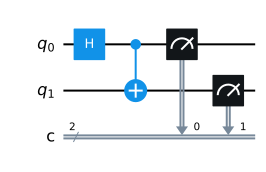

In [1]:
from qiskit import QuantumCircuit

# Create a new circuit with 2 qubits and 2 classical bits (cbits)
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0,1)

# Measure qubit 0 to cbit 0, and qubit 1 to cbit 1
qc.measure(0, 0)
qc.measure(1, 1)

# Create a drawing of the circuit using MatPlotLib ("mpl").
# Users in text-based environments can remove the "mpl" argument
# to get a text drawing, and print the result.
qc.draw("mpl")

## Running your quantum program

Quantum circuits can produce random results, so you'll often want to collect a sample of the outputs by running the circuit many times. The following code samples the circuit using the `Sampler` class. 

This tutorial uses Qiskit's built-in `Sampler`, which can only handle small numbers of qubits. You can replace this with samplers of high-performance simulators from [Qiskit Aer](https://github.com/Qiskit/qiskit-aer#readme), or with samplers that send your circuit over the internet to run on real quantum computers.

In [2]:
from qiskit.primitives import Sampler

# Create a Sampler object
sampler = Sampler()

# Submit the circuit to the sampler
job = sampler.run(qc)

# Once the job is complete, get the result
job.result()

SamplerResult(quasi_dists=[{0: 0.4999999999999999, 3: 0.4999999999999999}], metadata=[{}])

The `qasi_dists` property is a list of sampled distributions for each circuit we provided. In this case we only provided one circuit, so the list only has one element.

The distribution is a dictionary-like object. The keys are the measured outputs, and the values are the fraction of the time that output was measured. In this case, `0` was measured ~50% of the time, and `3` (which is `11` in binary) was also measured ~50% of the time.

And that's it! You now have everything you need to write and run quantum programs.

### Plotting results

You can use the `plot_histogram` function to plot your `Sampler` results. This function returns a MatPlotLib `Figure`, which displays nicely in Jupyter notebooks.

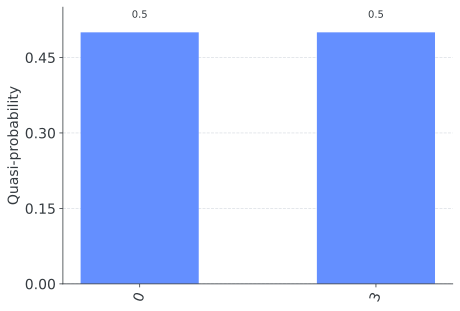

In [3]:
from qiskit.visualization import plot_histogram

plot_histogram(
    job.result().quasi_dists
)

In [4]:
import qiskit.tools.jupyter
%qiskit_version_table